# Avaliando o desempenho de uma Random Forest para o conjunto de dados SysFall

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import os
from sklearn.svm import SVC
import seaborn as sns

### Avaliando o desempenho do modelo para Random Forest sem feature extraction e classes balanceadas

In [2]:
#Ler o novo dataset sem as features
dataset = pd.read_csv('dataset_balanceado.csv')

# Separa os recursos (X) e o rótulo (y)
X = dataset.iloc[:, :-1] # Todos os dados, exceto o último (que é o rótulo)
y = dataset.iloc[:, -1]   # Última coluna como rótulo

# Divide o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Testando com 50 árvores

In [3]:
# Treinando o modelo para random forest classifier
model_rf = RandomForestClassifier(n_estimators=50, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [4]:
# Salvar o modelo treinado
joblib.dump(model_rf, 'model_rf_50trees_sem_feature_balanceado.pkl')

['model_rf_50trees_sem_feature_balanceado.pkl']

Acurácia: 0.87
Precisão: 0.91
Recall: 0.82
F1-Score: 0.86


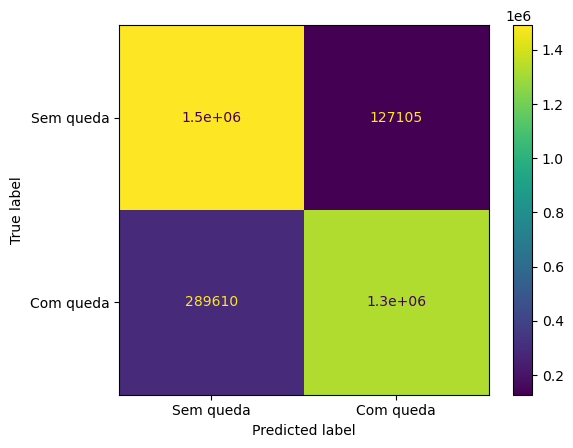

In [5]:
# Testando o modelo a partir do modelo salvo
model_rf = joblib.load('model_rf_50trees_sem_feature_balanceado.pkl')
y_pred_rf = model_rf.predict(X_test)

# Calcula a acurácia, precisão, recall e f1-score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Acurácia: {accuracy_rf:.2f}')

precision_rf = precision_score(y_test, y_pred_rf)
print(f'Precisão: {precision_rf:.2f}')

recall_rf = recall_score(y_test, y_pred_rf)
print(f'Recall: {recall_rf:.2f}')

f1_rf = f1_score(y_test, y_pred_rf)
print(f'F1-Score: {f1_rf:.2f}')

# Plotar a matriz de confusão de forma formatada
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sem queda', 'Com queda'])
disp.plot()
plt.show()

#### Salvando os coeficientes do modelo escolhido

In [6]:
# Carrega o modelo escolhido
model_rf = joblib.load('model_rf_50trees_sem_feature_balanceado.pkl')

# Salva os coeficientes do modelo em um arquivo
np.savetxt('coeficientes_classe_balanceada.csv', model_rf.feature_importances_, delimiter=',')

# Carrega os coeficientes do arquivo
coeficientes = np.loadtxt('coeficientes_classe_balanceada.csv', delimiter=',')
print(coeficientes)

[0.15990896 0.26617394 0.16888082 0.13738665 0.13651833 0.1311313 ]


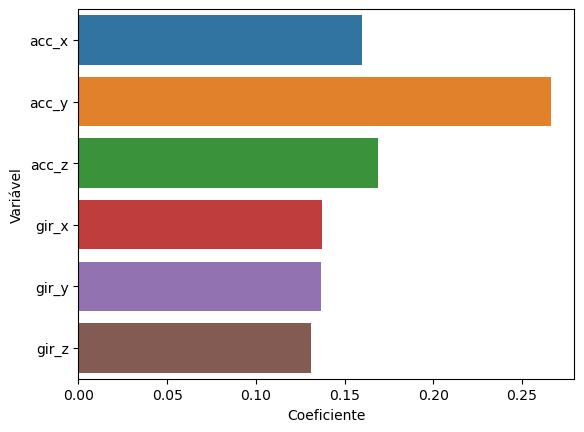

In [7]:
# Cria um DataFrame com os coeficientes
df_coef = pd.DataFrame({'Variável': dataset.columns[:-1], 'Coeficiente': coeficientes})

# Exibe o DataFrame
sns.barplot(x='Coeficiente', y='Variável', data=df_coef)

# Salva o gráfico como imagem
plt.savefig('graficocoeficientesbalanceados.png', bbox_inches='tight')

# Mostra o gráfico
plt.show()
